In [1]:
# import the necessary packages
from collections import deque
from imutils.video import VideoStream
from matplotlib import pyplot as plt
from skimage import morphology
from PIL import Image
import time
from copy import deepcopy

import numpy as np
import argparse
import cv2
import imutils
import time

In [176]:
def process_template(template, fileName):
    # plt.imshow(template)
    gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    #print(gray.shape)
    binary = (255-gray)
    cnts = get_contours(binary)
    box  = get_box(cnts)
    crop_temp = template[ box[1][1]:box[3][1], box[1][0]:box[3][0] ].copy()
    print("crop temp shape ", crop_temp.shape)
    cv2.imwrite(fileName, crop_temp) 

In [2]:
# Convert to Binary
# https://techtutorialsx.com/2019/04/13/python-opencv-converting-image-to-black-and-white/
def get_binary(crop_simg):
    gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray,5)

    #ret, th1 = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
    #th2 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    # need the one below
    th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    #titles = ['Original Image', 'Global Thresholding (v = 127)',
             #'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    #images = [gray, th1, th2, th3]

    #for i in range(4):
    #    plt.subplot(2,2,i+1), plt.imshow(images[i],'gray')
    #    plt.title(titles[i])
    #    plt.xticks([]), plt.yticks([])
    
    plt.imshow(th3)
    return th3
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #(thresh, binary) = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)
    #edgeMap = imutils.auto_canny(gray)
    #plt.imshow(binary, cmap='gray')
    #plt.show()

In [188]:
# find contours in the mask
def get_contours(invert):
    cnts = cv2.findContours(invert.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    center = None
    return cnts

# get largest enclosing box
def get_box(cnts):
    print("cnts len ",len(cnts))
    if len(cnts) > 0:
        #index = cnts.index(max(cnts, key=cv2.contourArea))
        #print(index)
        #cnts.pop(index)
        c = max(cnts, key=cv2.contourArea)
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
    return box

# draw rect
def draw_box(img,box):
    cv2.drawContours(img, [box], 0,(0,255,0),1)
    plt.imshow(img)

In [4]:
## Helper Functions for displaying image and scaling
def scale_img(img, scale_percent):
    #print("\nscale_img()")
    #print(img.shape)
    
    # Scaled Image Dimensions
    width  = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    # resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #print(img.shape)
    return img

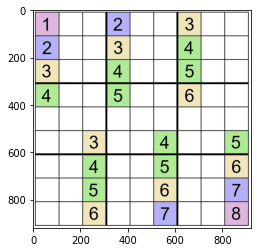

In [324]:
## Read in a File
frame = cv2.imread('sample4.png', cv2.IMREAD_COLOR) # Read the file
sf = 1
scaled = scale_img(frame, sf*100)
rgb = cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)
plt.imshow(scaled)
plt.show()

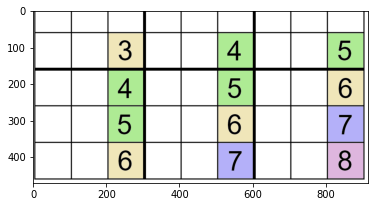

In [323]:
## Crop the image (1)
# crop_img = frame[y:y+h, x:x+w].copy()
crop_img = scaled[ int(sf*450):int(sf*2950), int(sf*5):int(sf*2900) ].copy()
plt.imshow(crop_img)
plt.show()

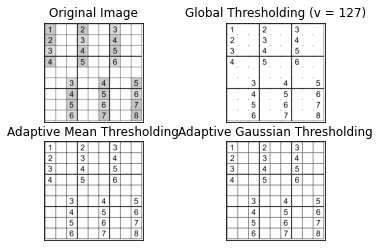

In [325]:
# Convert to Binary
# https://techtutorialsx.com/2019/04/13/python-opencv-converting-image-to-black-and-white/
img = scaled
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(gray,5)

ret, th1 = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# need the one below
th3 = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
#th3 = cv2.adaptiveThreshold(blurred, 50, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
         'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gray, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()
#gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#(thresh, binary) = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)
#edgeMap = imutils.auto_canny(gray)
#plt.imshow(binary, cmap='gray')
#plt.show()

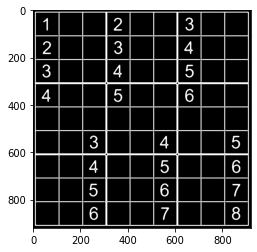

In [326]:
# Remove Noise
# https://scikit-image.org/docs/0.9.x/api/skimage.morphology.html#remove-small-objects
cleaned = morphology.remove_small_objects(th3, min_size=64, connectivity=1)
invert = (255-cleaned)

plt.imshow(invert,cmap='gray')
plt.show()

cnts len  1


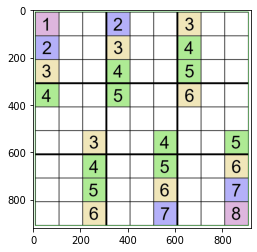

In [327]:
# find contours in the mask and draw largest enclosing rect
cnts = get_contours(invert)
box = get_box(cnts)
draw_box(scaled, box)

In [329]:
print(box)

[[  8 909]
 [  8   7]
 [910   7]
 [910 909]]


In [330]:
#print(type(box))
#print(box)
box2 = deepcopy(box)
#box2[0][1] = box2[0][1] + 12
#box2[3][1] = box2[3][1] + 12

print(box2)
ind = np.lexsort((box2[:,1],box2[:,0]))
print('sorted')
box2 = box2[ind]
print(box2)
#print(np.sort(box2, axis=0))
#print(np.sort(box2, axis=1))
# print(box2)
# idx = np.argmin(box2)
# print(idx)
# # box2 = np.delete(box2,idx,0)
# yeet = deepcopy(np.delete(box2,idx,0))
# print(yeet)
# idx = np.argmin(yeet)
# print(idx)


# print(np.argmin(box2))
# box2 = np.delete(box2,2)
# print(box2)
# print(np.argmin(box2))
# box2 = np.delete(box2,2)
# print(box2)
#def sort_box(box):
#    sorty = np.array()
#    for i in range(3):
#         = delete(np.argmin(box))

[[  8 909]
 [  8   7]
 [910   7]
 [910 909]]
sorted
[[  8   7]
 [  8 909]
 [910   7]
 [910 909]]


type  <class 'numpy.ndarray'>


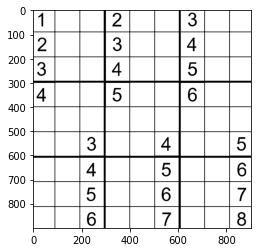

In [331]:
# perform perspective correction using the Bounding Box
rect = np.float32(box2)
dst = np.float32(np.asarray([[0, 0], [0, 930], [930, 0], [930, 930]]))
#rect = np.array(rect[0] rect[1] rect[2] rect[3])
M = cv2.getPerspectiveTransform(rect, dst)
warped = cv2.warpPerspective(scaled, M, (930, 930))[15:915,15:915]

warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
ret, warped = cv2.threshold(warped, 127, 255, cv2.THRESH_BINARY)
warped[warped<ret] = 0
warped =  cv2.cvtColor(warped,cv2.COLOR_GRAY2RGB)

plt.imshow(warped)
print("type ", type(warped[0]))

In [332]:
# templates = cv2.imread('template0.jpg')
# templates = [templates [cv2.imread('template1.jpg')]]
# gray_box  = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_box)
# plt.imshow(template0)
template0  = cv2.imread('template0.jpg') 
template1  = cv2.imread('template1B.jpg')
template2  = cv2.imread('template2B.jpg')
template3  = cv2.imread('template3B.jpg')
template4  = cv2.imread('template4.jpg')
template5  = cv2.imread('template5B.jpg')
template6  = cv2.imread('template6B.jpg')
template7  = cv2.imread('template7B.jpg')
template8  = cv2.imread('template8B.jpg')
template9  = cv2.imread('template9.jpg')
# default templates
templates  = np.asarray([template0, template1, template2, template3, template4, template5, template6, template7, template8, template9])

# scaled templates
#templates  = np.asarray(
#    [scale_img(template0,),
#     template1,
#     template2,
#     template3,
#     template4,
#     template5,
#     template6,
#     template7,
#     template8, 
#     template9])

# gtemplate0 = cv2.cvtColor(template0, cv2.COLOR_BGR2GRAY)
# gtemplate1 = cv2.cvtColor(template1, cv2.COLOR_BGR2GRAY)
# gtemplate2 = cv2.cvtColor(template2, cv2.COLOR_BGR2GRAY)
# gtemplate3 = cv2.cvtColor(template3, cv2.COLOR_BGR2GRAY)
# gtemplate4 = cv2.cvtColor(template4, cv2.COLOR_BGR2GRAY)
# gtemplate5 = cv2.cvtColor(template5, cv2.COLOR_BGR2GRAY)
# gtemplate6 = cv2.cvtColor(template6, cv2.COLOR_BGR2GRAY)
# gtemplate7 = cv2.cvtColor(template7, cv2.COLOR_BGR2GRAY)
# gtemplate8 = cv2.cvtColor(template8, cv2.COLOR_BGR2GRAY)
# gtemplate9 = cv2.cvtColor(template9, cv2.COLOR_BGR2GRAY)
# gtemplates = np.asarray([gtemplate0,gtemplate1,gtemplate2,gtemplate3,gtemplate4,gtemplate5,gtemplate6,gtemplate7,gtemplate8,gtemplate9])


In [306]:
print(template9.shape)
process_template(template9,'template9B.jpg')

(70, 70, 3)
cnts len  20
crop temp shape  (69, 55, 3)


In [307]:
def get_square(img, x, y):
    lil_square = img[(y-1)*100:((y-1)+1)*100 - 1,(x-1)*100:((x-1)+1)*100 - 1]
    return lil_square

In [308]:
def get_correlation_xy(image, x, y, template):
    # tiny_box = get_square(image, x, y)[5:95,5:95]
    #print("get_correlation_xy()\nshape ",template.shape)
    #print("temp type ",type(template[0]))
    tiny_box = get_square(image, x, y)
    #print("tiny_box type ",type(tiny_box[0]))
    correlation_out = cv2.matchTemplate(template, tiny_box, cv2.TM_SQDIFF_NORMED)
    return np.min(correlation_out)


In [309]:
def detect_number(image, x, y, templates):
    match = np.zeros(9)
    for i in range(9):
        match[i] = get_correlation_xy(image, x, y, templates[i])
    number = np.argmin(match)
    return number

#     return match

0


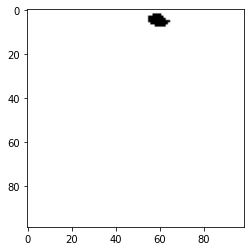

In [310]:
x = 4
y = 1
nine = (detect_number(warped, x, y, templates))
print(nine)
poop = get_square(warped, x, y)
plt.imshow(poop)
# plt.imshow(templates[0])
# print(templates[0].shape)
# print(warped.shape)

In [311]:
def get_sudoku_matrix(image, templates):
    match = np.zeros((9,9))
    for y in range(1,10):
        for x in range(1,10):
            match[x-1,y-1] = detect_number(image, y, x, templates)
    return match
            

In [312]:
def solveSudoku(container):
# using explicit solver

    unsolvedSudoku = deepcopy(container)
    start = time.time()
    zero_count = 0
    for l in container:
        for v in l:
            if v == 0:
                zero_count += 1

    solving = True


    while solving:
        #Solver Portion
        container, stump_count = explicit_solver(container)

        #Loop-Breaking Portion
        zero_count = 0
        for l in container:
            for v in l:
                if v == 0:
                    zero_count += 1
        if zero_count==0:
    #         print_container(container)
            solving=False
        if stump_count > 0:
            for i in range(9):
                for j in range(9):
                    container = implicit_solver(i,j,container)

    print('That took ' + str(time.time()-start) + ' seconds!')
    
    # only return numbers to be projected
    projectSudoku = np.subtract(container, unsolvedSudoku)
    return projectSudoku

In [313]:
###  Defining Functions  ###
# helper functions
subtract_set = {1,2,3,4,5,6,7,8,9}

def check_horizontal(i,j):
    return subtract_set - set(container[i])

def check_vertical(i,j):
    ret_set = []
    for x in range(9):
        ret_set.append(container[x][j])
    return subtract_set - set(ret_set)

def check_square(i,j):
    first = [0,1,2]
    second = [3,4,5]
    third = [6,7,8]
    find_square = [first,second,third]
    for l in find_square:
        if i in l:
            row = l
        if j in l:
            col = l
    ret_set = []
    for x in row:
        for y in col:
            ret_set.append(container[x][y])
    return subtract_set - set(ret_set)

def get_poss_vals(i,j):
    poss_vals = list(check_square(i,j).intersection(check_horizontal(i,j)).intersection(check_vertical(i,j)))
    return poss_vals

def explicit_solver(container):
    # attempts to solve entire sudoku puzzle
    stump_count = 1
    for i in range(9):
        for j in range(9):
            if container[i][j] == 0:
                poss_vals = get_poss_vals(i,j)
                if len(poss_vals) == 1:
                    container[i][j] = list(poss_vals)[0]
#                     print_container(container)
                    stump_count = 0
    return container, stump_count

def implicit_solver(i,j,container):
    # attempts to solve a position in sudoku puzzle
    if container[i][j] == 0:
        poss_vals = get_poss_vals(i,j)
        
        #check row
        row_poss = []
        for y in range(9):
            if y == j:
                continue
            if container[i][y] == 0:
                for val in get_poss_vals(i,y):
                    row_poss.append(val)
        if len(set(poss_vals)-set(row_poss)) == 1:
            container[i][j] = list(set(poss_vals)-set(row_poss))[0]
        
        #check column
        col_poss = []
        for x in range(9):
            if x == i:
                continue
            if container[x][j] == 0:
                for val in get_poss_vals(x,j):
                    col_poss.append(val)
        if len(set(poss_vals)-set(col_poss)) == 1:
            container[i][j] = list(set(poss_vals)-set(col_poss))[0]
                
        #check square
        first = [0,1,2]
        second = [3,4,5]
        third = [6,7,8]
        find_square = [first,second,third]
        for l in find_square:
            if i in l:
                row = l
            if j in l:
                col = l
        square_poss = []
        for x in row:
            for y in col:
                if container[x][y] == 0:
                    for val in get_poss_vals(x,y):
                        square_poss.append(val)
        if len(set(poss_vals)-set(square_poss)) == 1:
            container[i][j] = list(set(poss_vals)-set(square_poss))[0]
    return container

def print_container(container):
    container = np.asarray(container) 
    for i in range(9):
        if i%3 == 0:
            print('-------------------------------')
        print('| ' + str(container[i][0:3]) + ' | ' + str(container[i][3:6]) + ' | '  + str(container[i][6:9]) + ' |')

    print('-------------------------------')

In [333]:
# RUN THIS FOR SUDOKU
sudoku = np.uint8(get_sudoku_matrix(warped, templates))
print_container(sudoku)

-------------------------------
| [0 0 0] | [0 0 0] | [0 0 0] |
| [0 0 0] | [0 0 0] | [4 0 0] |
| [0 0 0] | [4 0 0] | [0 0 0] |
-------------------------------
| [4 0 0] | [0 0 0] | [0 0 0] |
| [0 0 0] | [0 0 0] | [0 0 0] |
| [0 0 0] | [0 0 4] | [0 0 0] |
-------------------------------
| [0 0 4] | [0 0 0] | [0 0 0] |
| [0 0 0] | [0 0 0] | [0 0 7] |
| [0 0 0] | [0 0 7] | [0 0 0] |
-------------------------------


In [ ]:
# RUN THIS TO SOLVE ONLY IF INPUT MATRIX IS RIGHT
# ELSE IT NEVER SOLVES BECAUSE INPUT IS WRONG
container = deepcopy(sudoku)
sudoku_missing = solveSudoku(container)
print(sudoku)
print(sudoku_missing)

In [22]:
# TESTING

print(detect_number(warped, 9, 1, templates))


5


In [10]:
# DO NOT DELETE!!!

# # generate templates for matching
# # 9
# tmp = get_square(warped, 5, 1)
# template = tmp[7:77,19:89]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# plt.imshow(template, cmap='gray')
# cv2.imwrite('template9.jpg', template)
#
# # 8
# tmp = get_square(warped, 5, 3)
# template = tmp[13:83,19:89]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# plt.imshow(template, cmap='gray')
# cv2.imwrite('template8.jpg', template)
#
# # 7
# tmp = get_square(warped, 3, 8)
# template = tmp[30:100,12:82]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# plt.imshow(template, cmap='gray')
# cv2.imwrite('template7.jpg', template)
#
# # 6
# tmp = get_square(warped, 4, 6)
# template = tmp[21:91,17:87]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# plt.imshow(template, cmap='gray')
# cv2.imwrite('template6.jpg', template)
#
# # 5
# tmp = get_square(warped, 3, 5)
# template = tmp[19:89,15:85]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# plt.imshow(template, cmap='gray')
# cv2.imwrite('template5.jpg', template)
#
# # 4
# tmp = get_square(warped, 1, 1)
# template = tmp[5:75,8:78]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# plt.imshow(template, cmap='gray')
# cv2.imwrite('template4.jpg', template)
#
# # 3
# tmp = get_square(warped, 4, 2)
# template = tmp[10:80,17:87]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# plt.imshow(template, cmap='gray')
# cv2.imwrite('template3.jpg', template)
#
# # 2
# tmp = get_square(warped, 1, 2)
# template = tmp[8:78,7:77]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# plt.imshow(template, cmap='gray')
# cv2.imwrite('template2.jpg', template)
#
# # 1
# tmp = get_square(warped, 3, 1)
# template = tmp[5:75,14:84]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# plt.imshow(template, cmap='gray')
# cv2.imwrite('template1.jpg', template)
#
# # 0
# tmp = get_square(warped, 5, 2)
# template = tmp[7:77,19:89]
# gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# ret, template = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# template[template<ret] = 0
# # plt.imshow(template, cmap='gray')
# cv2.imwrite('template0.jpg', template)
#

161149230.0


AttributeError: module 'cv2' has no attribute 'cv2'

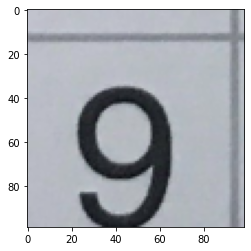

In [26]:
# FOR TESTING



# for y in range(1,10):
#     for x in range(1,10):
template = cv2.imread('template1.jpg')
x = 2
y = 9

tiny_box = get_square(warped, x, y)[5:95,5:95]
correlation_out = cv2.matchTemplate(template, tiny_box, cv2.TM_SQDIFF)
plt.imshow(tiny_box)

print(np.min(correlation_out))

template = cv2.imread('template4.jpg')
correlation_out = cv2.matchTemplate(template, tiny_box, cv2.TM_SQDIFF)
plt.imshow(tiny_box)
print(np.min(correlation_out))

print(type(tiny_box[0,0][0]))
print(type(template[0,0][0]))
